In this notebook we will demonstrate the use of the `TableAutomization.py` file with the `banana` distribution provided by the cuqipy package.

 __The Aim__:
- allow sampling with different sampling methods at the same time 
- compare these sampling methods in terms of different parameters 
- visualize the distribution (in case of 2D and 1D)


__The Sampling Methods__:
So far the sampling methods implemented are
- (Random Walk) Metropolis Hastings (fixed or adapted): __MH_fixed__ or __MH_adapted__
- Unadjusted Langevin algorithm: __ULA__
- Metropolis-adjusted Langevin algorithm: __MALA__
- No-U-Turn Sampler: __NUTS__

__The inputs__: 
The user has to provide just a few parameters used for the sampling methods:
- __target__:
 The target distribution to sample. Must have logpdf and gradient method. Custom logpdfs and gradients are supported by using a cuqi.distribution.UserDefinedDistribution.

- __scale__ (float): 
    - __MH_fixed__ or __MH_adapted__: Scale parameter used to define correlation between previous and proposed sample in random-walk.
    - __ULA__: The Langevin diffusion discretization time step (In practice, a scale of 1/dim**2 is recommended but not guaranteed to be the optimal choice)
    - __MALA__:  The Langevin diffusion discretization time step.
    - __NUTS__: no scale needed 

- __Ns__ (int): used for sampling, number of samples needed 
- __Nb__ (int): used for sampling, number of samples burned 

- __x0__ (numpy array or distribution): The intial sampling point (If it is a distibution,you randomly sample one point from the distribution)
- __seed__(int): random seed 
- __chains__(int): used for calculating Rhat, number of chains

_NOTE_: the three parameters above (__scale__, __Ns__, __Nb__) can be either scalars (the same for all sampling methods) or arrays of 5 elements (particular for each sampling method) and the parameter(__x0__) can be eithe numpy array or CUQI distribution object.

__The outputs__:
- __ESS__: Compute effective sample size (ESS) of sample in 2 dimensions
- __AR__: compute acceptance rate
- __Rhat__: Compute estimate of rank normalized splitR-hat for a set of traces in 2 dimensions

    _Note_: Rhat is computed only when __x0__ is a distribution (see Second Example)
- __LogPDF__: with `cProfile` we compute how many time `logpdf` is computed, hence can see the computational costs clearer
- __Gradient__: with `cProfile` we compute how many time `gradient` is computed, hence can see the computational costs clearer



__Some Refrences__:
- [Paper 1](https://www.annualreviews.org/content/journals/10.1146/annurev-statistics-031219-041300;jsessionid=TKW5pLRFW97UtpPBBYBxgXAiAZrGhBqlYBZu9ouv.annurevlive-10-241-10-70)
- [Paper 2](https://arxiv.org/pdf/1308.6221)
- [Paper 3](https://dl.acm.org/doi/full/10.1145/3580278)

### Importing the needed libraries 

In [1]:
from cuqi.distribution import DistributionGallery, Gaussian, JointDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS
import time

import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))

# Now you should be able to import the module
from utilities import TableAutomization as TA



# The banana distribution


In [2]:
# The banana distribution 
target_banana = DistributionGallery("banana")


### Plotting the "banana"

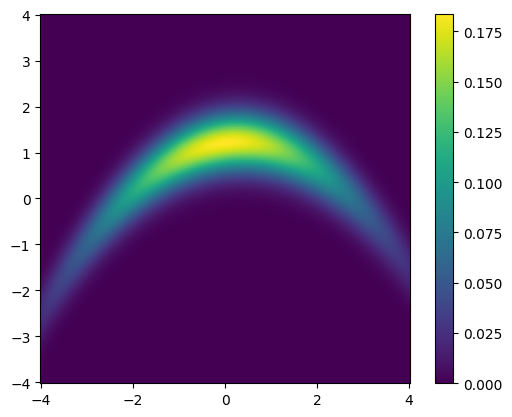

In [3]:
TA.plot_pdf_2D(target_banana, -4, 4, -4, 4)

## 1. First Example 


- Compute sampling methods


In [4]:
df , (fig, axs) = TA.create_comparison(target_banana, [0.05, 0.05, 0.065, 0.065, 0.05 ], [10000, 8500, 10000, 10000, 1000],[0, 1500, 0, 5000, 100], x0 = np.array([1, 1]), seed = 12, chains=2)

Sample 10000 / 10000

Average acceptance rate: 0.9521 

Sample 10000 / 10000

Average acceptance rate: 0.6334117647058823 MCMC scale: 0.7951759146005821 

Sample 10000 / 10000
Sample 15000 / 15000
Sample 1100 / 1100


- Print table

In [5]:
TA.print_table(df)

+-----------------+----------------+-----------------+----------------+----------+----------+-------+--------+----------+
| Sampling Method | No. of Samples | No. of Burn-ins | Scaling Factor | ESS (v0) | ESS (v1) |   AR  | LogPDF | Gradient |
+-----------------+----------------+-----------------+----------------+----------+----------+-------+--------+----------+
|     MH_fixed    |     10000      |        0        |      0.05      |  2.633   |  3.265   | 0.952 | 10000  |    0     |
|    MH_adapted   |      8500      |       1500      |      0.05      |  46.605  | 112.923  | 0.633 | 10000  |    0     |
|       ULA       |     10000      |        0        |     0.065      |  36.992  |  66.737  |  1.0  | 10000  |  10000   |
|       MALA      |     10000      |       5000      |     0.065      |  44.679  |  91.23   | 0.967 | 15000  |  15000   |
|       NUTS      |      1000      |       100       |      0.05      |  13.654  |  35.392  | 0.761 |  5400  |   5400   |
+-----------------+-----

- Create distribution images  

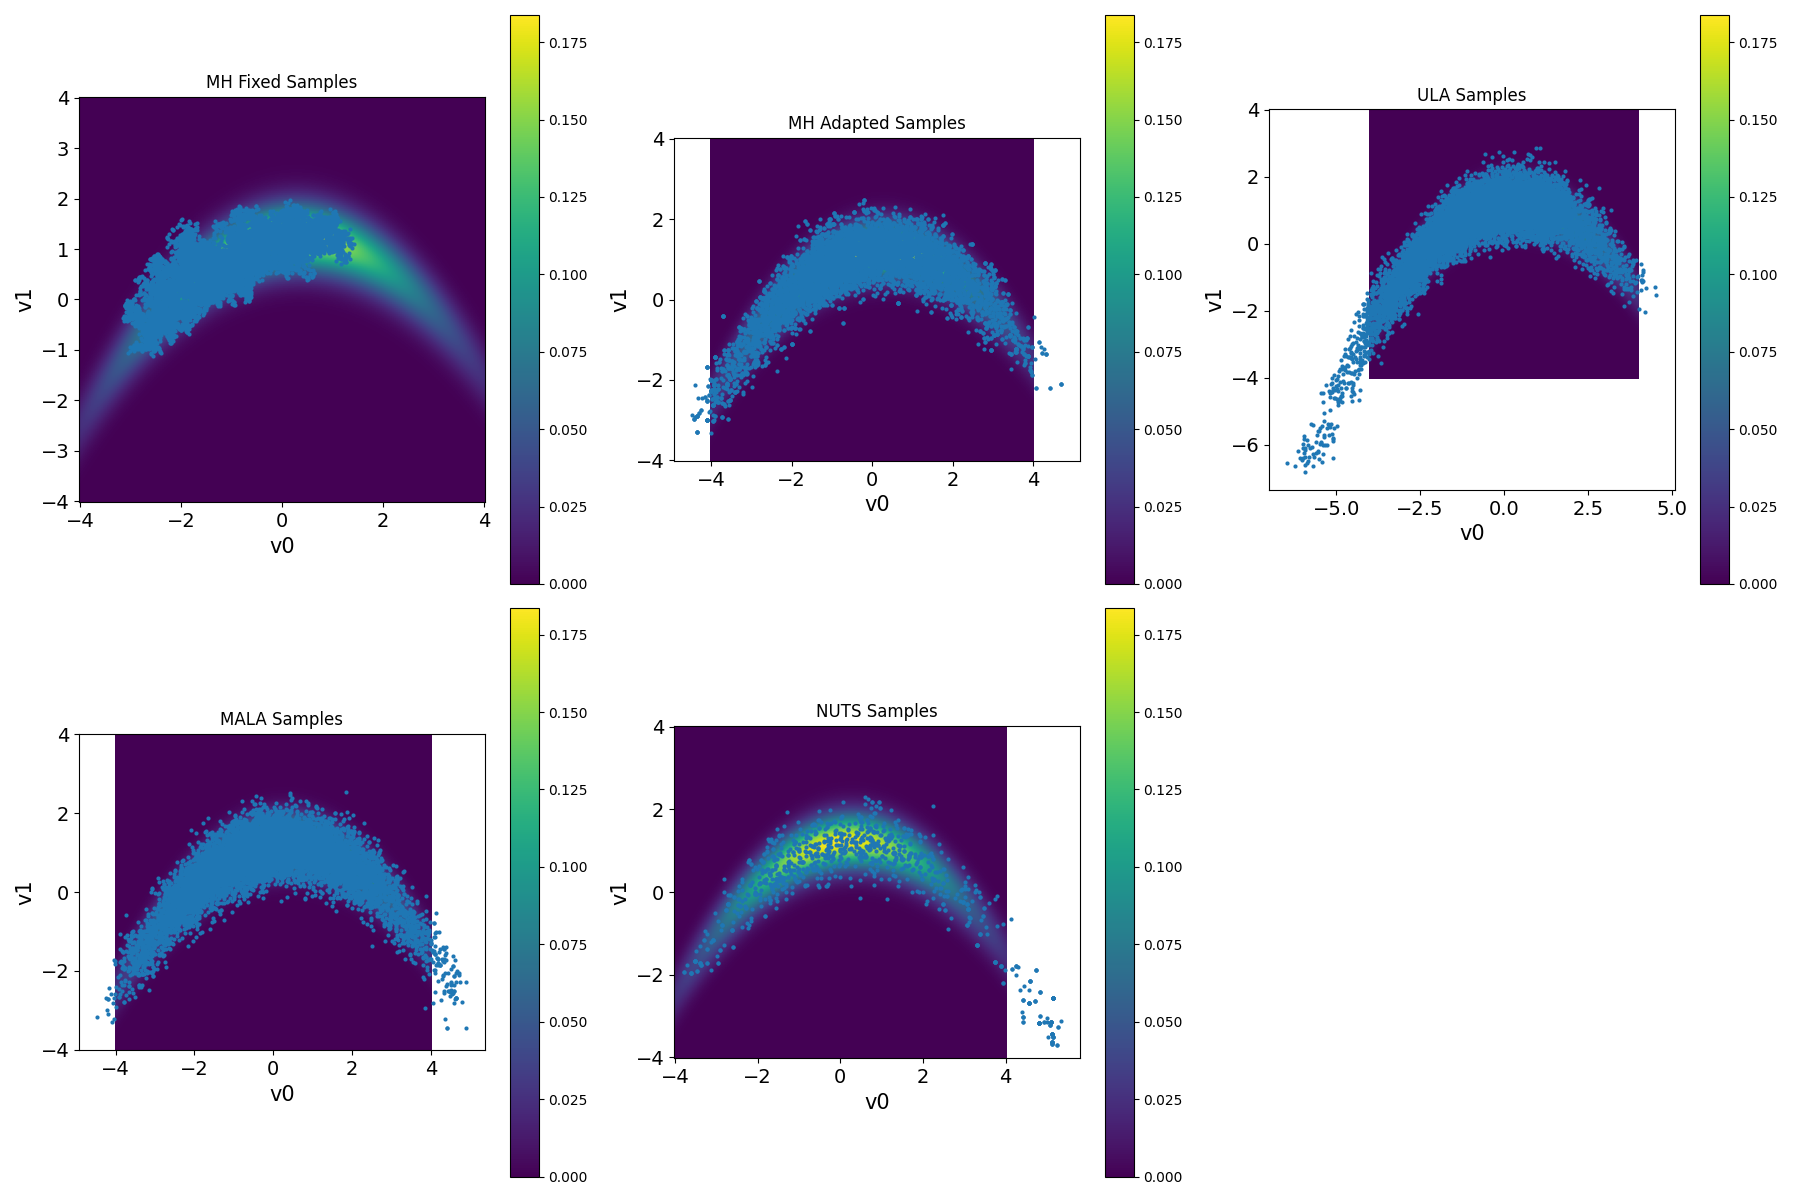

In [6]:
TA.show_plot(fig)

## 2. Second example

- Compute sampling methods

In [7]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [8]:
df, (fig, axs) = TA.create_comparison(target_banana, 0.05, 8500, 1500, x0 = y, seed = 12,chains=2)

Sample 10000 / 10000

Average acceptance rate: 0.9504705882352941 

Sample 10000 / 10000

Average acceptance rate: 0.6355294117647059 MCMC scale: 0.7891182759887843 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000

Average acceptance rate: 0.9504705882352941 

Sample 10000 / 10000

Average acceptance rate: 0.6355294117647059 MCMC scale: 0.7891182759887843 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 10000 / 10000



- Print table

In [9]:
TA.print_table(df)

+-----------------+----------------+-----------------+----------------+----------+----------+-------+-----------+-----------+--------+----------+
| Sampling Method | No. of Samples | No. of Burn-ins | Scaling Factor | ESS (v0) | ESS (v1) |   AR  | Rhat (v0) | Rhat (v1) | LogPDF | Gradient |
+-----------------+----------------+-----------------+----------------+----------+----------+-------+-----------+-----------+--------+----------+
|     MH_fixed    |      8500      |       1500      |      0.05      |   1.44   |   1.84   |  0.95 |   1.648   |   1.442   | 10000  |    0     |
|    MH_adapted   |      8500      |       1500      |      0.05      |  52.906  | 128.642  | 0.636 |   1.004   |    1.0    | 10000  |    0     |
|       ULA       |      8500      |       1500      |      0.05      |  26.974  |  54.189  |  1.0  |   1.011   |   1.005   | 10000  |  10000   |
|       MALA      |      8500      |       1500      |      0.05      |  29.533  |  49.19   | 0.977 |   1.012   |    1.02   

- Create distribution images  

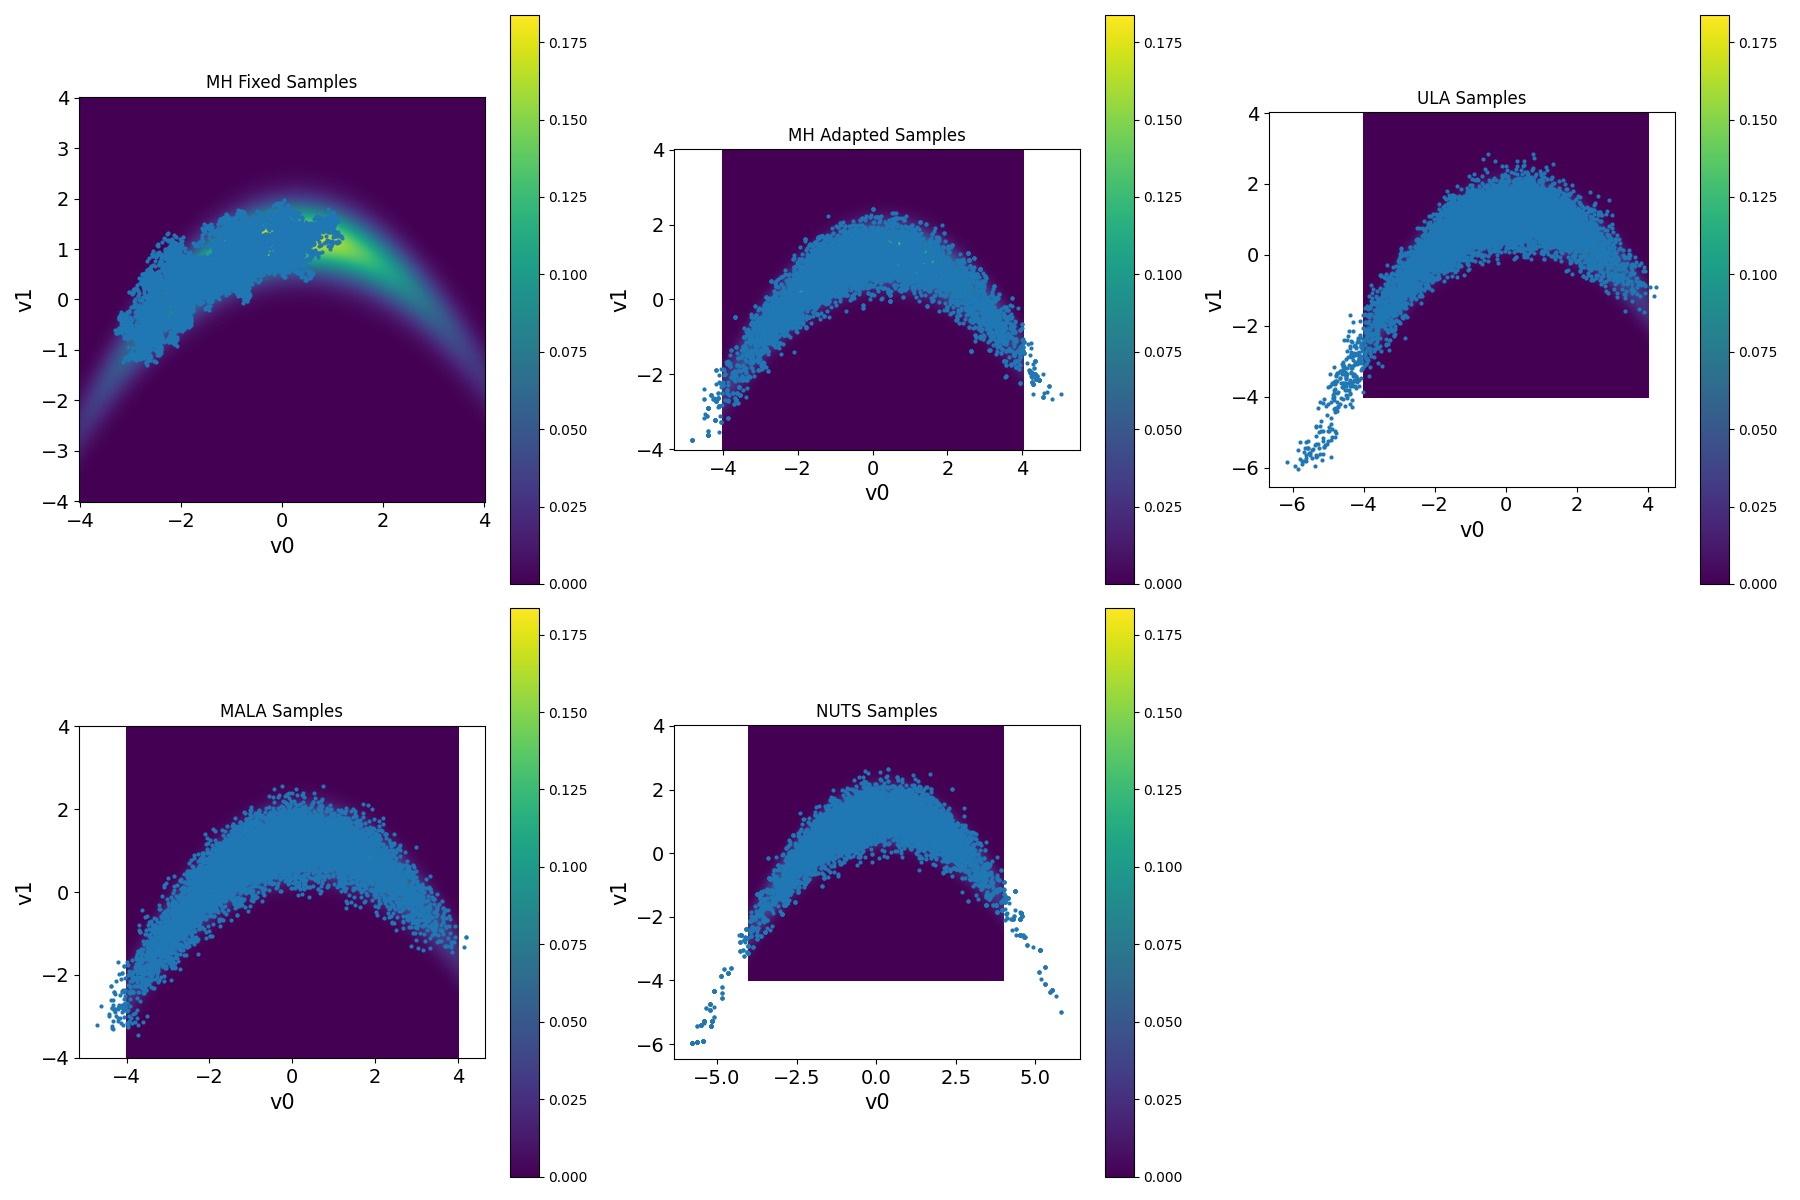

In [10]:
TA.show_plot(fig)